In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import datetime as dt
import plotly as py
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs
from plotly.offline import init_notebook_mode
from plotly.offline import plot,iplot
init_notebook_mode(connected=True)
def configure_plotly_browser_state():
    import IPython
    display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))
configure_plotly_browser_state()

import IPython
IPython.get_ipython().events.register('pre_run_cell', configure_plotly_browser_state)
from IPython.core.display import HTML

In [2]:
# Carregando csv
data = pd.read_csv("purchases.txt",sep="\t", header=None,  parse_dates=[2],dtype={0:np.object})
data.head()

,0,1,2
0,760,25.0,2009-11-06
1,860,50.0,2012-09-28
2,1200,100.0,2005-10-25
3,1420,50.0,2009-07-09
4,1940,70.0,2013-01-25


In [3]:
# Verificando formato dos dados
data.dtypes

0            object
1           float64
2    datetime64[ns]
dtype: object

In [4]:
# Renomeando as colunas
data.columns= ['customer_id','purchase_amount','date_of_purchase']

# Extrair ano da compra
data['year_of_purchase'] = data['date_of_purchase'].dt.year

# Extrair mês da compra
data['month_of_purchase'] = data['date_of_purchase'].dt.strftime('%b')

# Visualizando as 5 primeiras linhas do dataframe
data.head()

,customer_id,purchase_amount,date_of_purchase,year_of_purchase,month_of_purchase
0,760,25.0,2009-11-06,2009,Nov
1,860,50.0,2012-09-28,2012,Sep
2,1200,100.0,2005-10-25,2005,Oct
3,1420,50.0,2009-07-09,2009,Jul
4,1940,70.0,2013-01-25,2013,Jan


In [5]:
# Obtendo uma estatistica basica dos dados
data.describe()

,purchase_amount,year_of_purchase
count,51243.000000,51243.000000
mean,62.337195,2010.869699
std,156.606801,2.883072
min,5.000000,2005.000000
25%,25.000000,2009.000000
50%,30.000000,2011.000000
75%,60.000000,2013.000000
max,4500.000000,2015.000000


In [6]:
# Obtendo numero de compras por ano, valor médio anual de compra e total de por ano
agg_dados = data.groupby('year_of_purchase').agg(compras_ano = ('year_of_purchase','count'), valor_compra_medio = ('purchase_amount', 'mean'),total_compras=('purchase_amount','sum')).reset_index()

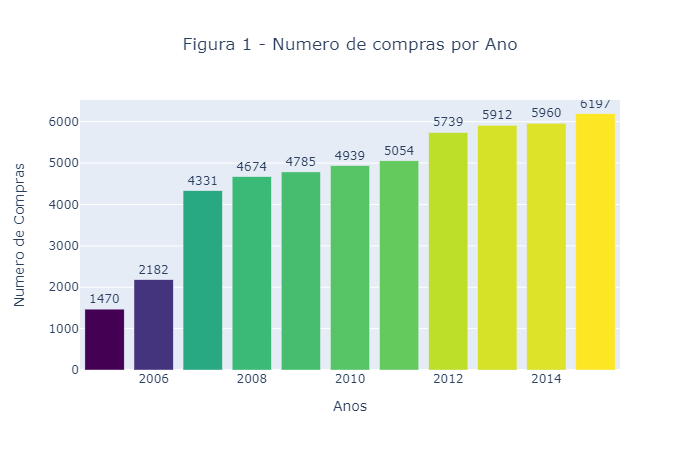

In [7]:
# Grafico Numero de Compras por Ano
trace = go.Bar(y= agg_dados.compras_ano.sort_values(), 
               x= agg_dados['year_of_purchase'],text = agg_dados.compras_ano.sort_values(),textposition= "outside",
               marker={'color': agg_dados.compras_ano.sort_values(),
                   'colorscale': 'Viridis'})
layout = go.Layout(title="Figura 1 - Numero de compras por Ano ", 
                   xaxis={'title' : "Anos"},
                  yaxis={'title' : "Numero de Compras"},
                  title_x=0.5)
fig = go.Figure(data=trace, layout=layout)
iplot(fig)
fig.show('png')

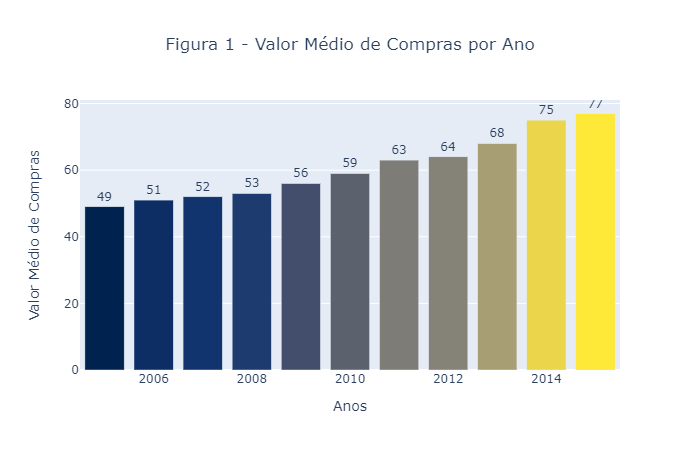

In [8]:
# Grafico Valor Médio de Compra por Ano

valor = agg_dados['valor_compra_medio'].sort_values()
valor = valor.round(0)
trace = go.Bar(y= valor, 
               x= agg_dados['year_of_purchase'],text = valor,textposition= "outside",
               marker={'color': valor,
                   'colorscale': 'Cividis'})
layout = go.Layout(title="Figura 1 - Valor Médio de Compras por Ano ", 
                   xaxis={'title' : "Anos"},
                  yaxis={'title' : "Valor Médio de Compras"},
                  title_x=0.5)
fig = go.Figure(data=trace, layout=layout)
iplot(fig)
fig.show('png')

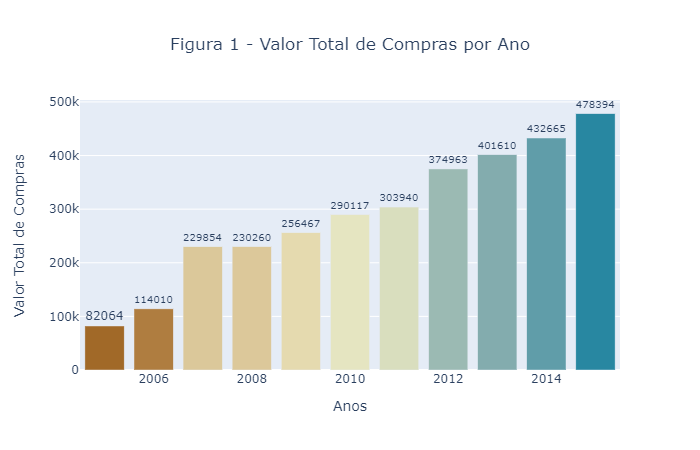

In [9]:
# Grafico Valor Total de Compras por ano

valor = agg_dados['total_compras'].sort_values()
valor = valor.round(0)
trace = go.Bar(y= valor, 
               x= agg_dados['year_of_purchase'],text = valor,textposition= "outside",
               marker={'color': valor,
                   'colorscale': 'Earth'})
layout = go.Layout(title="Figura 1 - Valor Total de Compras por Ano ", 
                   xaxis={'title' : "Anos"},
                  yaxis={'title' : "Valor Total de Compras"},
                  title_x=0.5)
fig = go.Figure(data=trace, layout=layout)
iplot(fig)
fig.show('png')